<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-Max0730/blob/main/T4_ML_NMZM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import pandas as pd
#import scienceplots

In [2]:
drive.mount("/content/drive/")  #Para acceder a los archivos en drive

Mounted at /content/drive/


In [3]:
 data = np.loadtxt('/content/drive/MyDrive/Data/olympic100m_men.txt', delimiter=',').T

In [4]:
#Función para calcular los pesos según el grado
def cost_train_data(x, y, n= 1):

    xv = x[:, np.newaxis]
    datax = [xv**(i) for i in range(n+1)]
    X = np.hstack(datax)
    t = y[:, np.newaxis]
    #Implementamos en forma matricial, el calculo de los pesos
    w = np.linalg.inv(X.T @ X) @ X.T @ t

    cost = np.mean((X @ w - y)**2)

    return cost

x = data[0]
y = data[1]

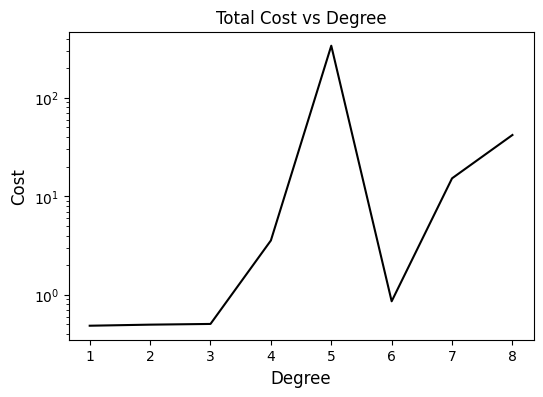

In [5]:
degree = 8
costes = [cost_train_data(x, y, i) for i in range(1, degree+1)]
degrees = np.arange(1,degree+1)

fig = plt.figure(figsize=(6, 4))
plt.plot(degrees, costes, 'k')
plt.yscale('log')
plt.xlabel('Degree', fontsize= 12)
plt.ylabel('Cost', fontsize= 12);
plt.title('Total Cost vs Degree');

In [6]:
#Definimos una función para calcular el coste, una vez ajustado el modelo
def cost_validation(x, y, weights):
    datax = np.vstack([x**(i) for i in range(len(weights))]).T
    predictions = datax @ weights
    cost = np.mean((predictions - y)**2)
    return cost

def weight_model(x, y, n= 1):

    xv = x[:, np.newaxis]
    datax = [xv**(i) for i in range(n+1)]
    X = np.hstack(datax)
    t = y[:, np.newaxis]
    #Implementamos en forma matricial, el calculo de los pesos
    w = np.linalg.inv(X.T @ X) @ X.T @ t

    return w

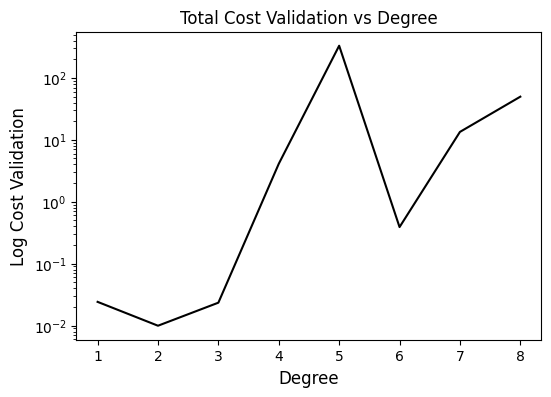

In [7]:
#Generamos nuestro conjunto de validación
validation_set_x = x[x>1980]
validation_set_t = y[x>1980]

degree = 8
degrees = np.arange(1,degree+1)

#Calculamos los pesos hasta grado 8
weights = [weight_model(x, y, i) for i in range(1, degree+1)]
#Calculamos los costos del conjunto de validación, en cada uno de los modelos
cost_validations = [cost_validation(validation_set_x, validation_set_t, w) for w in weights]

fig = plt.figure(figsize=(6, 4))
plt.plot(degrees, cost_validations, 'k')
plt.yscale('log')
plt.xlabel('Degree', fontsize= 12)
plt.ylabel('Log Cost Validation', fontsize= 12);
plt.title('Total Cost Validation vs Degree');

In [8]:
#Leave-One-Out-Croos-Validation

def leave_one_out_cross_validation(x, y, n):
    #Definimos el número de samples, que tomaremos
    #Este caso k = N
    samples = len(x)
    total_cost = 0

    for i in range(samples):
       #Tomamos un dato para validar nuestro modelo
       x_val = x[i]
       y_val = y[i]

       #Tomamos el resto del dataset, para poder entrenar nuestro modelo
       x_train = np.delete(x, i)
       y_train = np.delete(y, i)

       #"Entrenamos" el modelo
       w_aux = weight_model(x_train, y_train, n)

       #Calculomos su cost validation
       cost = cost_validation(x_val, y_val, w_aux)
       #Sumamos los costos
       total_cost += cost


    return total_cost/samples

In [9]:
degree = 8
degrees = np.arange(1,degree+1)

loocv = [leave_one_out_cross_validation(x, y, i) for i in range(1,degree+1)] #No encontré el error :c

fig = plt.figure(figsize=(6, 4))
plt.plot(degrees, loocv, 'k')
plt.yscale('log')
plt.xlabel('Degree', fontsize= 12)
plt.ylabel('Lost LOOCV', fontsize= 12);

LinAlgError: ignored